# Scientific computing set 3
Sander Broos, Nick van Santen

In [1]:
from wave_equation import WaveEquation
from spring import Spring

import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

## Part 1

$\lambda =$ 4.42037


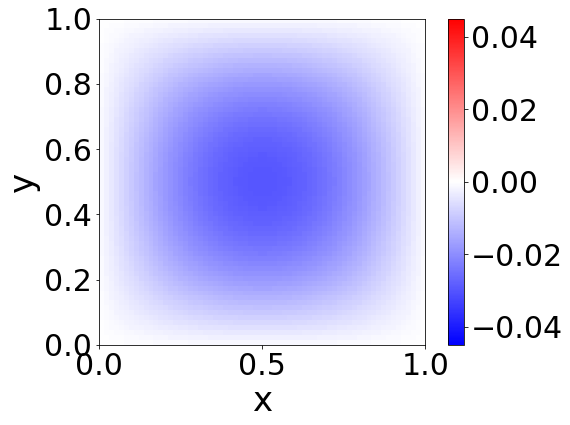

$\lambda =$ 6.98769


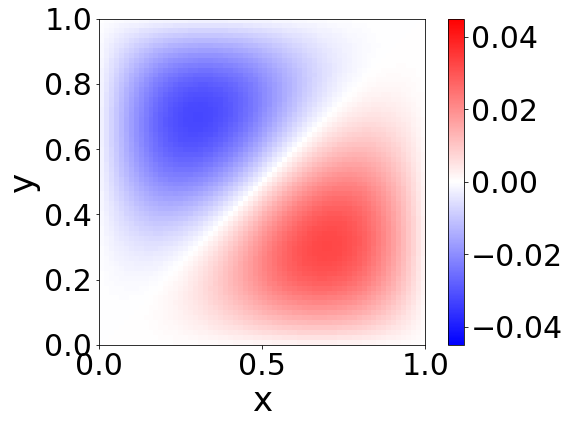

$\lambda =$ 6.98769


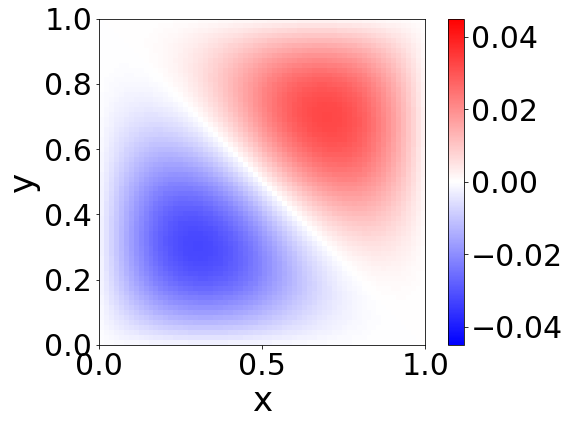

$\lambda =$ 8.83832


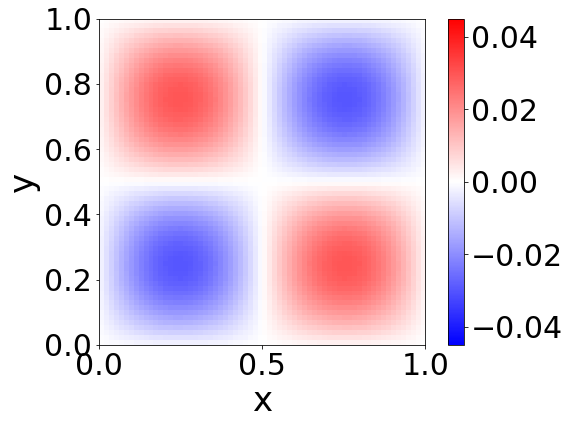

$\lambda =$ 4.79312


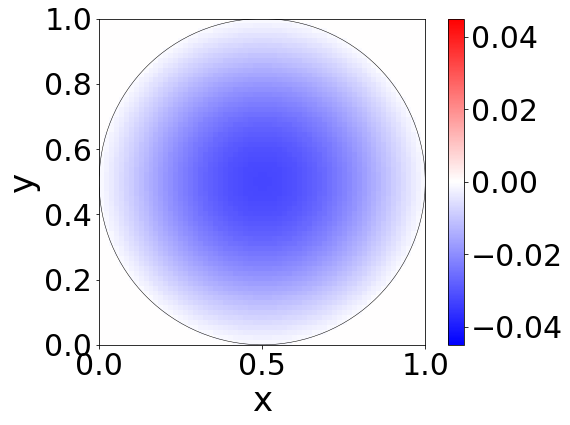

$\lambda =$ 7.63511


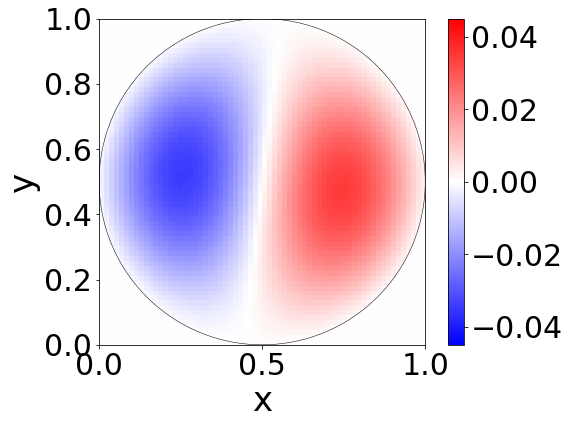

$\lambda =$ 7.63511


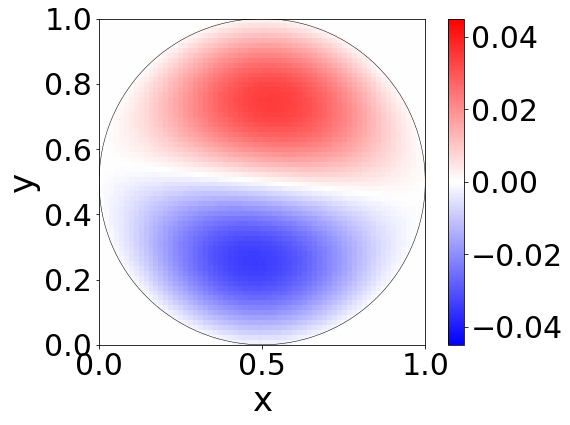

$\lambda =$ 10.21373


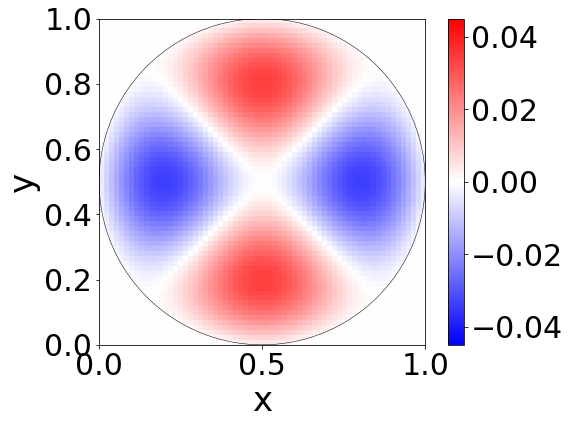

In [5]:
WaveEquation(dx=0.015, L_x = 1, L_y = 1, circle=False, sparse=False).show_eigenvectors(4, cmap='bwr')
WaveEquation(dx=0.015, L_x = 1, L_y = 2, circle=False, sparse=False).show_eigenvectors(4, cmap='bwr')
WaveEquation(dx=0.015, L_x = 1, L_y = 1, circle=True, sparse=False).show_eigenvectors(4, cmap='bwr')

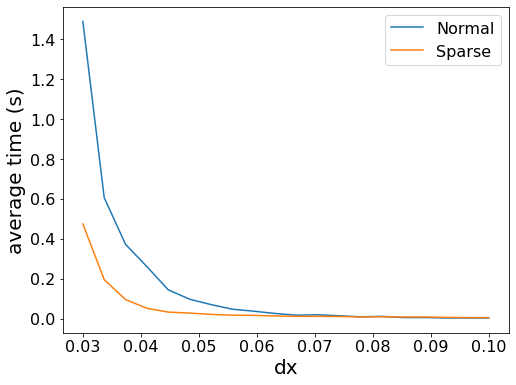

In [20]:
standard_avgs = []
sparse_avgs = []
dx_values = np.linspace(0.03, 0.1, 20)
N = 50

for dx in dx_values:
    print(dx, end='\r')
    standard = []
    sparse = []

    for _ in range(N):
        standard.append(WaveEquation(dx=dx, L_x = 1, L_y = 1, circle=False, sparse=False).eigenvalues(10)[2])
        sparse.append(WaveEquation(dx=dx, L_x = 1, L_y = 1, circle=False, sparse=True).eigenvalues(10)[2])
    
    standard_avgs.append(np.mean(standard))
    sparse_avgs.append(np.mean(sparse))

# plt.yscale('log')
plt.plot(dx_values, standard_avgs, label="Normal")
plt.plot(dx_values, sparse_avgs, label="Sparse")
plt.legend()
plt.ylabel("average time (s)")
plt.xlabel("dx")
plt.show()

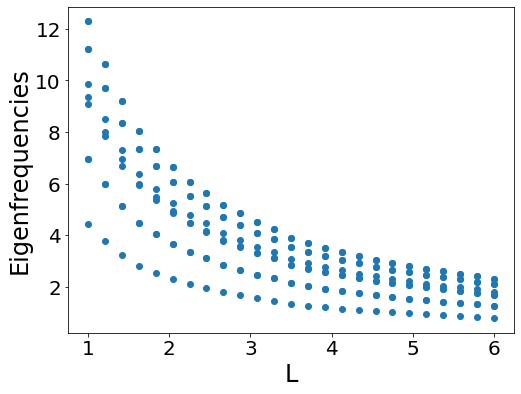

In [22]:
def spectrum_per_L(L_x, L_y, circle):
    L_values = []
    freqs = []

    for L in np.linspace(1, 6, 25):
        eigenfreqs = np.sqrt(-1*np.array(WaveEquation(dx=0.1, L_x = L_x*L, L_y = L_y*L, circle=circle, sparse=True).eigenvalues(10)[0]))
        freqs.extend(eigenfreqs)
        for _ in range(len(eigenfreqs)):
            L_values.append(L)

    plt.scatter(L_values, freqs)
    plt.xlabel("L")
    plt.ylabel("Eigenfrequencies")
    plt.show()

spectrum_per_L(1, 1, False)
spectrum_per_L(2, 1, False)
spectrum_per_L(1, 1, True)

0.008
0.012
0.016
0.02
0.024
0.028
0.032
0.036000000000000004
0.04
0.044000000000000004
0.048
0.052
0.056
0.060000000000000005
0.064
0.068
0.07200000000000001
0.07600000000000001
0.08000000000000002
0.08399999999999999
0.088
0.092
0.096
0.1
0.10400000000000001
0.10800000000000001
0.11200000000000002
0.11599999999999999
0.12
0.124
0.128
0.132
0.136
0.14
0.14400000000000002
0.14800000000000002
0.15200000000000002
0.156
0.16
0.164
0.168
0.17200000000000001
0.17600000000000002
0.18000000000000002
0.184
0.188
0.192
0.196
0.2
0.20400000000000001
0.20800000000000002
0.21200000000000002
0.21600000000000003
0.22
0.224
0.228
0.232
0.23600000000000002
0.24000000000000002
0.24400000000000002
0.248


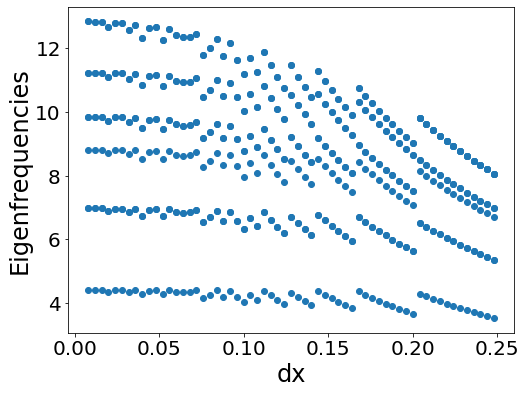

In [15]:
def spectrum_per_dx(L_x, L_y, circle):
    dx_values = []
    freqs = []

    for dx in np.arange(0.008, 0.25, 0.004):
        print(dx)
        eigenfreqs = np.sqrt(-1*np.array(WaveEquation(dx=dx, L_x = L_x, L_y = L_y, circle=circle, sparse=True).eigenvalues(10)[0]))
        freqs.extend(eigenfreqs)
        for _ in range(len(eigenfreqs)):
            dx_values.append(dx)

    plt.scatter(dx_values, freqs)
    plt.xlabel("dx")
    plt.ylabel("Eigenfrequencies")
    plt.show()

spectrum_per_dx(1, 1, False)

t = 0.24


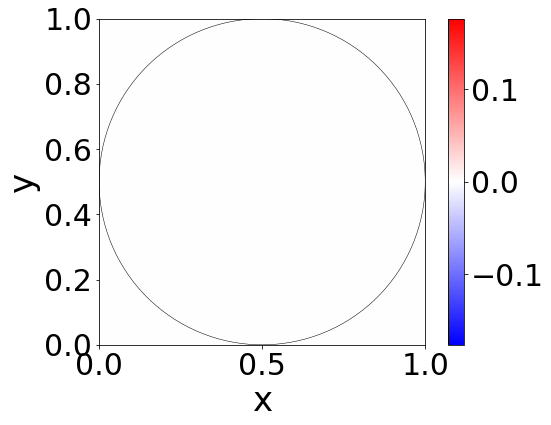

t = 0.4


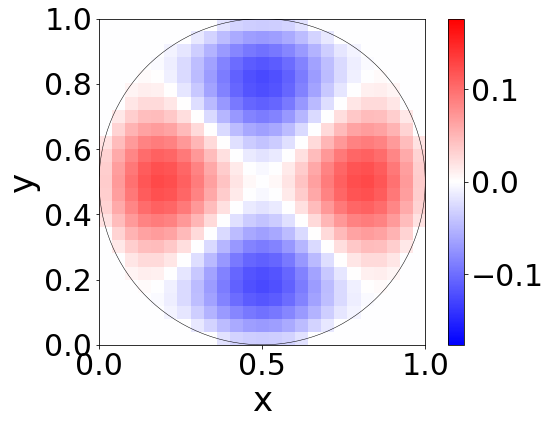

t = 0.56


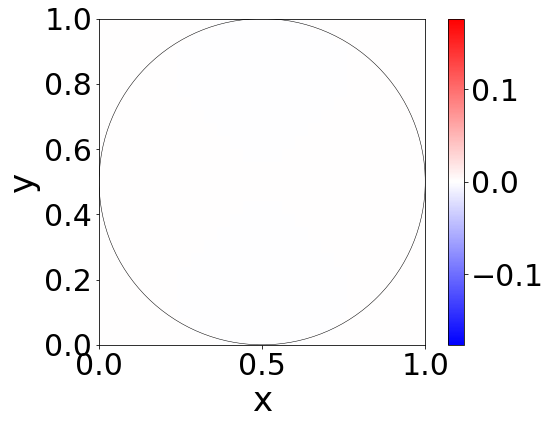

t = 0.72


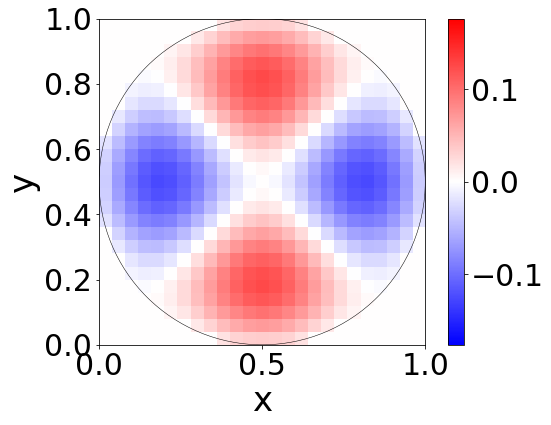

In [19]:
from matplotlib.colors import Normalize

def time_behavior(L_x, L_y, circle, eigenindex):
    wave = WaveEquation(dx=0.04, L_x = L_x, L_y = L_y, circle=circle, sparse=True)
    
    eigendata = wave.eigenvalues(eigenindex)
    eigenvalue = eigendata[0][eigenindex-1]
    eigenvector = eigendata[1][eigenindex-1]

    for t in np.linspace((0.75)*np.pi / (-eigenvalue)**0.5, (3 - 0.25)*np.pi / (-eigenvalue)**0.5, 4, endpoint=False):
        T = wave.time_dependence(t, eigenvalue)
        print(f"t = {round(t,2)}")
        wave.make_plot(np.reshape(eigenvector, (wave.M, wave.N)) * T, cmap="bwr", norm=Normalize(-np.amax(np.abs(eigenvector)) * 2, np.amax(np.abs(eigenvector)) * 2))

time_behavior(1, 1, False, 1)
time_behavior(1, 2, False, 2)
time_behavior(1, 1, True, 4)

## Part 2

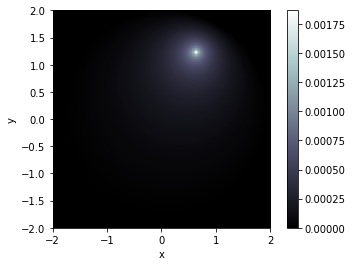

In [14]:
WaveEquation(dx=0.05, L_x=4, L_y=4, circle=True).direct_method()

## Part 3

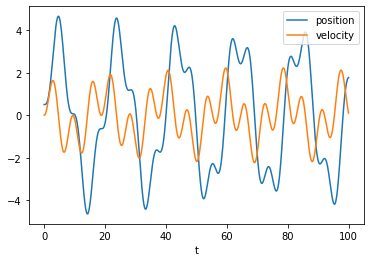

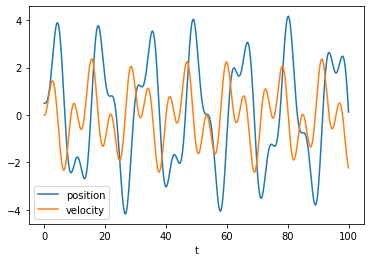

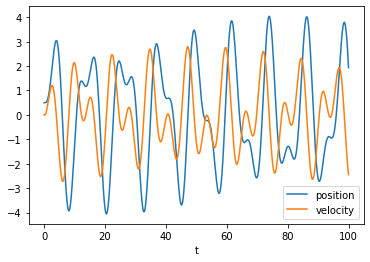

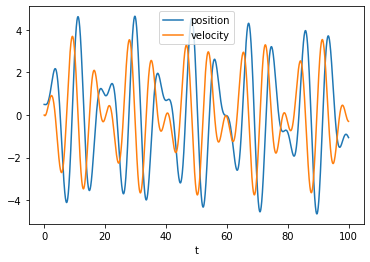

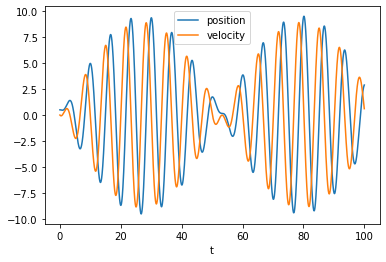

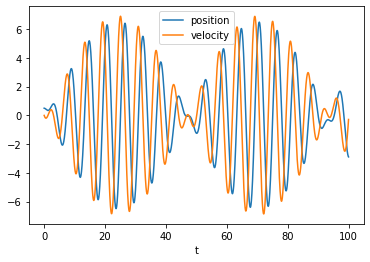

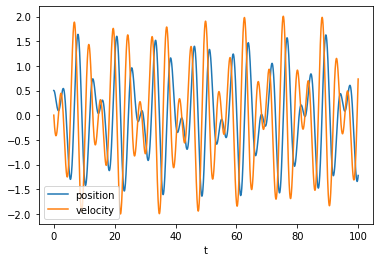

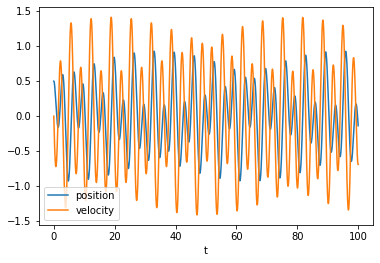

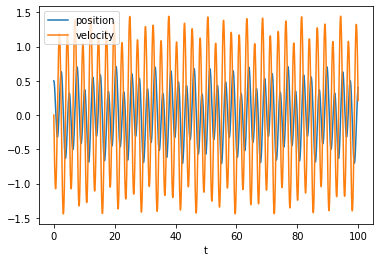

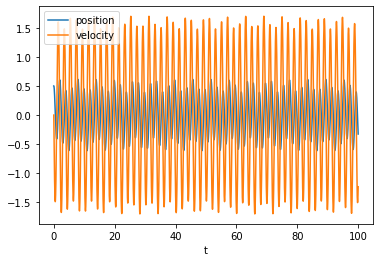

In [7]:
for k in np.logspace(-1, 1, 10):
    spring = Spring(0.5, 0, dt=0.01, k=k, driving_force_amplitude=1)
    spring.run(iterations=10000)
    spring.create_plot()

plt.show()


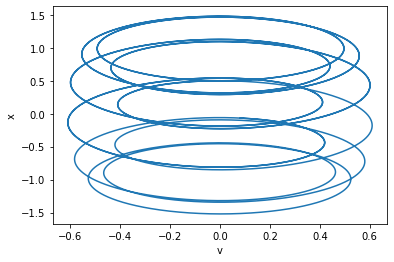

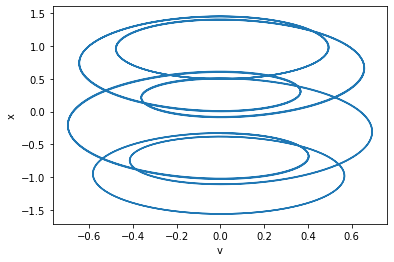

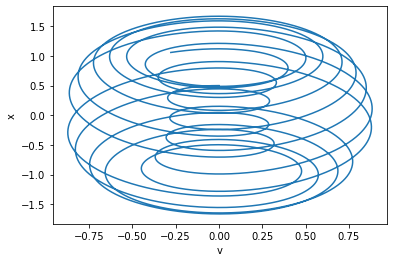

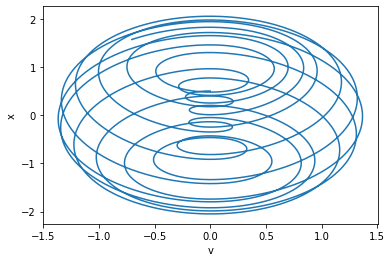

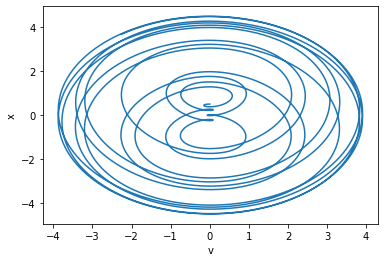

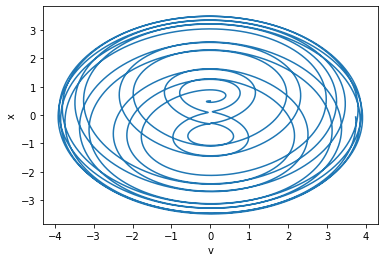

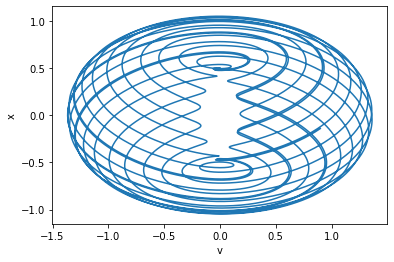

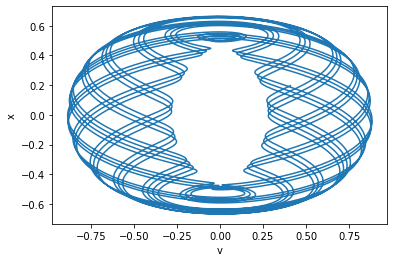

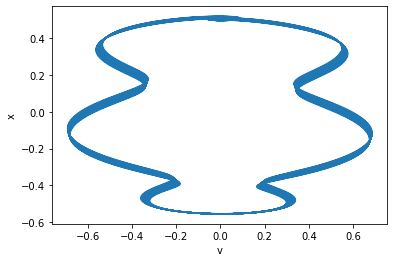

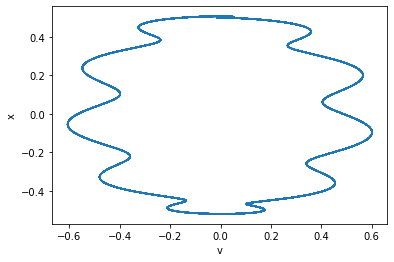

In [8]:
for omega in np.logspace(-1, 1, 10):

    spring = Spring(0.5, 0, driving_force_amplitude=1, omega=omega)
    spring.run(iterations=10000)
    spring.create_phase_plot()

plt.show()